<a href="https://colab.research.google.com/github/abhinav-exp/ELM_Implementaion/blob/main/ELM_ALL_MATIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EML** : *Moore-Penrose pseudoinverse vs JAYA vs TAO vs HHO*

---



## Common processes for all Moore-Penrose pseudoinverse, JAYA, TAO, HHO

###Importing All the neccessary libraries

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Data Collection

In [173]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataMATIC.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)
print(data1)

               Price
Time                
2019-04-27  0.005122
2019-04-28  0.004316
2019-04-29  0.003500
2019-04-30  0.004381
2019-05-01  0.004260
...              ...
2022-12-27  0.805883
2022-12-28  0.782003
2022-12-29  0.776588
2022-12-30  0.759566
2022-12-31  0.757676

[1345 rows x 1 columns]


### Normalisation of Data

In [174]:
data1min = data1.min()
data1max = data1.max()

normalize = lambda x: (x - data1min + 1)/(data1max - data1min + 2)
data2 = normalize(data1)
print(data2)

               Price
Time                
2019-04-27  0.205686
2019-04-28  0.205521
2019-04-29  0.205354
2019-04-30  0.205534
2019-05-01  0.205510
...              ...
2022-12-27  0.370065
2022-12-28  0.365163
2022-12-29  0.364051
2022-12-30  0.360557
2022-12-31  0.360169

[1345 rows x 1 columns]


In [175]:
denormalize = lambda x: (x)*np.float64(data1max - data1min + 2) + np.float64(data1min - 1)

### Sequence Convertion

In [176]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x)
  return pd.DataFrame(X)

data3 = split_sequence(data2, 10)
print(data3.shape)
print(data3)

(1335, 10)
             0         1         2         3         4         5         6  \
0     0.205686  0.205521  0.205354  0.205534  0.205510  0.205481  0.205490   
1     0.205521  0.205354  0.205534  0.205510  0.205481  0.205490  0.205436   
2     0.205354  0.205534  0.205510  0.205481  0.205490  0.205436  0.205397   
3     0.205534  0.205510  0.205481  0.205490  0.205436  0.205397  0.205403   
4     0.205510  0.205481  0.205490  0.205436  0.205397  0.205403  0.205340   
...        ...       ...       ...       ...       ...       ...       ...   
1330  0.372033  0.372247  0.363212  0.369361  0.367215  0.367713  0.368585   
1331  0.372247  0.363212  0.369361  0.367215  0.367713  0.368585  0.368023   
1332  0.363212  0.369361  0.367215  0.367713  0.368585  0.368023  0.367692   
1333  0.369361  0.367215  0.367713  0.368585  0.368023  0.367692  0.371714   
1334  0.367215  0.367713  0.368585  0.368023  0.367692  0.371714  0.370065   

             7         8         9  
0     0.205436 

### Training and Testing Split

In [177]:
train_x = data3.iloc[:int(0.85*len(data3)), :-1]
train_y = data3.iloc[:int(0.85*len(data3)), -1:]
test_x = data3.iloc[int(0.85*len(data3)):, :-1]
test_y = data3.iloc[int(0.85*len(data3)):, -1:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1134, 9)
(1134, 1)
(201, 9)
(201, 1)


## Moore-Penrose pseudoinverse

### Implementing the model

In [178]:
class ELM(object):
    def __init__(self, inputSize, outputSize, hiddenSize):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta
        return y

    def train(self, X, y):
        X = np.matrix(X)
        y = np.matrix(y)
        self.H = (X * self.weight.T) + self.bias
        self.H = self.sigmoid(self.H)
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T
        self.beta = H_moore_penrose * y
        return self.H * self.beta

In [179]:
elm = ELM(9, 1, 10)
elm.train(train_x,train_y)
pred_y_MPP = elm.predict(test_x)

### Prediction

In [180]:
pred_y_MPP[:, 0]

matrix([[0.31103241],
        [0.29361222],
        [0.29452784],
        [0.29714835],
        [0.28387   ],
        [0.29054686],
        [0.27627639],
        [0.28402546],
        [0.28866246],
        [0.28884629],
        [0.29996333],
        [0.31724344],
        [0.32644935],
        [0.32445412],
        [0.31968302],
        [0.31295035],
        [0.311114  ],
        [0.30837444],
        [0.30222238],
        [0.30246681],
        [0.30680478],
        [0.2995443 ],
        [0.3069812 ],
        [0.30946627],
        [0.31146523],
        [0.3206542 ],
        [0.32746439],
        [0.32407011],
        [0.3216608 ],
        [0.32054425],
        [0.31635576],
        [0.33651272],
        [0.34737083],
        [0.34716915],
        [0.35337314],
        [0.35679373],
        [0.39846015],
        [0.39106679],
        [0.37385573],
        [0.39301294],
        [0.3750587 ],
        [0.38842924],
        [0.38852664],
        [0.36474057],
        [0.36923686],
        [0

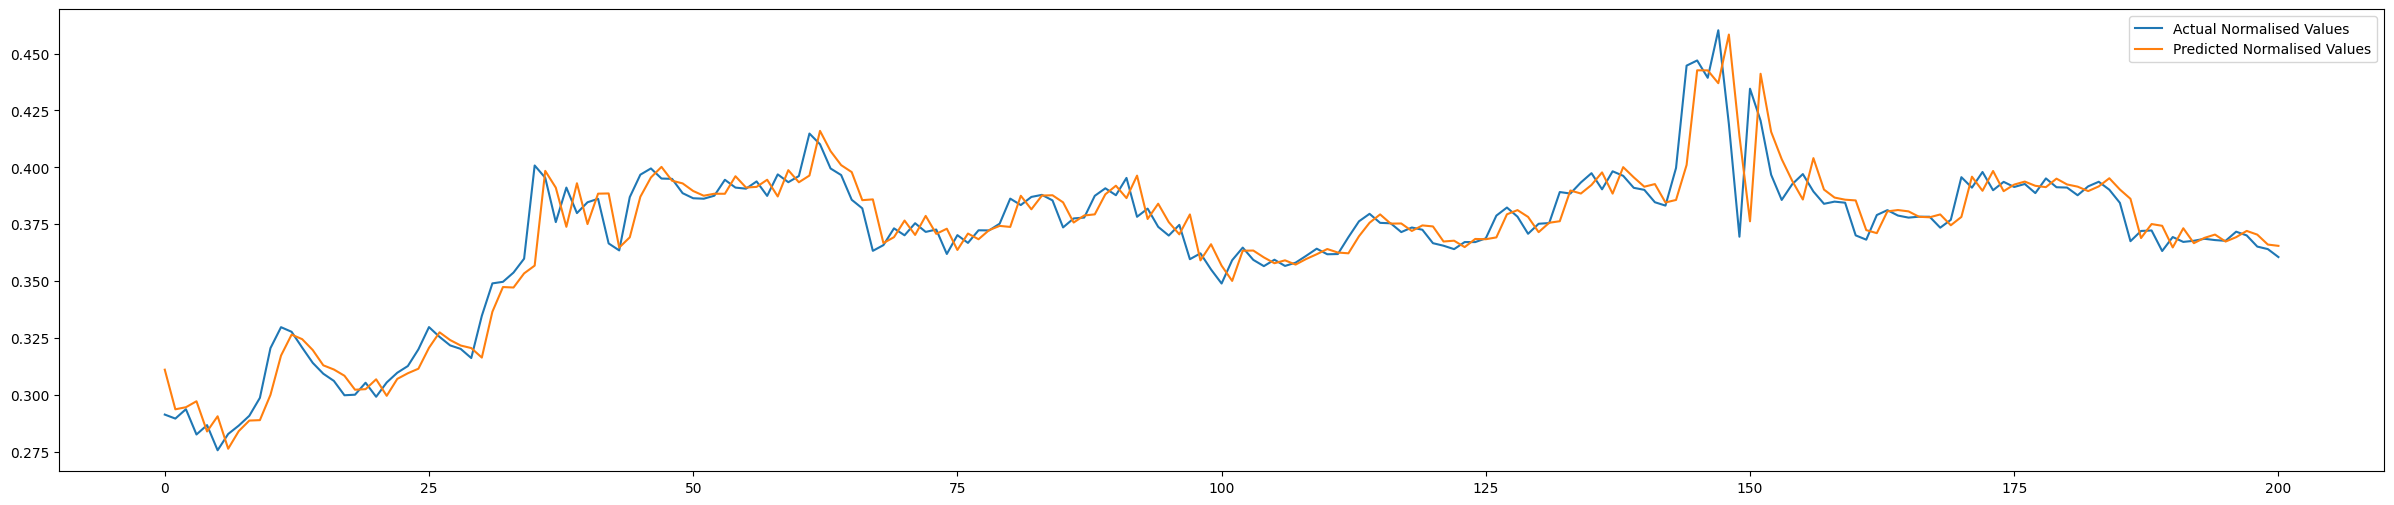

In [181]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(pred_y_MPP)
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [182]:
denormalized_preds_MPP = denormalize(pred_y_MPP)
# print(denormalized_preds)
preds1_MPP = pd.DataFrame(denormalized_preds_MPP)
preds1_MPP['DATE'] = data1.index[-1*len(preds1_MPP):]
preds1_MPP = preds1_MPP.set_index('DATE')
print(preds1_MPP)

                   0
DATE                
2022-06-14  0.518310
2022-06-15  0.433448
2022-06-16  0.437908
2022-06-17  0.450674
2022-06-18  0.385989
...              ...
2022-12-27  0.802172
2022-12-28  0.815582
2022-12-29  0.807620
2022-12-30  0.786340
2022-12-31  0.783577

[201 rows x 1 columns]


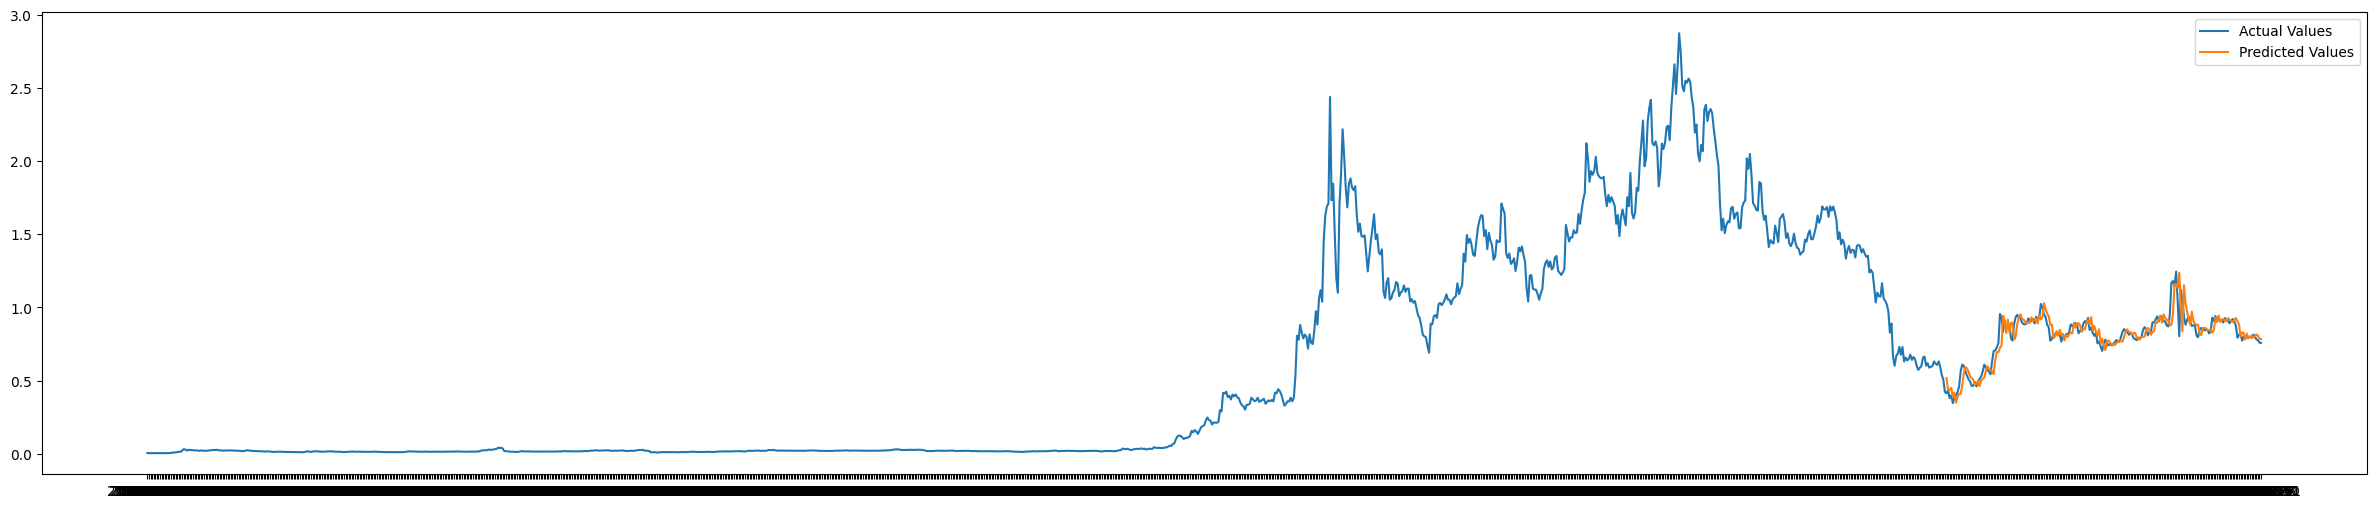

In [183]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [184]:
mse_MPP = np.mean((np.array(preds1_MPP[0]) - np.array(data1.iloc[-1*(len(preds1_MPP)):, 0]))**2)
print("mse  "+ str(mse_MPP))
print("rmse "+ str(np.sqrt(mse_MPP)))

mse  0.005039921620918615
rmse 0.07099240537493158


In [185]:
np.array(test_y - pred_y_MPP)[:, 0]

array([-1.97378041e-02, -4.07849918e-03, -8.70265358e-04, -1.46080100e-02,
        2.78759081e-03, -1.49498334e-02,  6.48873252e-03,  2.41692584e-03,
        2.10253115e-03,  9.80504956e-03,  2.05427152e-02,  1.24773183e-02,
        1.24133837e-03, -3.70880045e-03, -5.64454071e-03, -3.69109320e-03,
       -5.01011593e-03, -8.58179608e-03, -2.19407294e-03,  2.82643919e-03,
       -7.68441961e-03,  5.87062835e-03,  2.70847520e-03,  3.16927246e-03,
        8.52098339e-03,  9.10662276e-03, -2.00514069e-03, -2.35512003e-03,
       -1.48502153e-03, -4.38759642e-03,  1.83509077e-02,  1.24687958e-02,
        2.29992397e-03,  6.57238347e-03,  6.46977308e-03,  4.40293912e-02,
       -3.04939558e-03, -1.51368624e-02,  1.72485303e-02, -1.31305556e-02,
        9.58578006e-03, -2.24950996e-03, -2.19759469e-02, -1.25831081e-03,
        1.76738313e-02,  9.71246518e-03,  3.98669902e-03, -5.12733153e-03,
        8.25946752e-04, -4.30122203e-03, -3.18671687e-03, -1.31016502e-03,
       -8.73978900e-04,  

In [186]:
err_test_MPP = np.array(test_y - pred_y_MPP)[:, 0]
mse_test_MPP = np.mean(err_test_MPP ** 2)
rmse_test_MPP = np.sqrt(mse_test_MPP)
mae_test_MPP = np.mean(np.abs(err_test_MPP))
mape_test_MPP = np.mean(np.abs(err_test_MPP) / np.array(test_y)[:, 0])
MPPN = pd.DataFrame([[mse_test_MPP, rmse_test_MPP, mae_test_MPP, mape_test_MPP]], columns = ["mse", "rmse", "mae", "mape"], index = ['MPPN'])
MPPN

,mse,rmse,mae,mape
MPPN,0.000116,0.010771,0.00695,0.018641


## Jaya Optimisation

### Implementing the model

In [187]:
class JAYA_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.best = np.argmin(self.mse)
    self.worst = np.argmax(self.mse)
    self.best_error_graph = np.array([np.sum(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    # print("x", X.shape)
    # print("w", weight.shape)
    a = np.matmul(X, weight)
    # print("h", a.shape)
    # print("b", bias.shape)
    # print(len(bias.shape))
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    # print("c", c.shape)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def optimise(self, gen):
    for i in range(gen):
      r0 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      r1 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta
      new_beta += r0 * (self.beta[self.best] - self.beta)
      new_beta -= r1 * (self.beta[self.worst] - self.beta)
      new_pred = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
      new_error = (new_pred - self.train_py) ** 2
      new_mse = np.mean(new_error, axis = 1)
      cond = new_mse < self.mse
      self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
      self.mse = np.where(cond, new_mse, self.mse)
      self.best = np.argmin(self.mse)
      self.worst = np.argmax(self.mse)
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.sum(self.mse)]))



### Convergence Curve

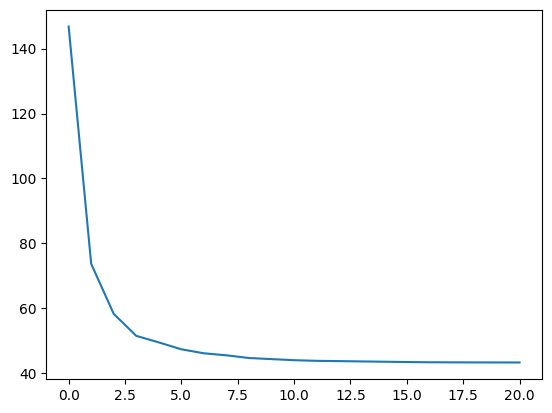

In [188]:
optimiser = JAYA_ELM(2000)
optimiser.optimise(20)
ec_Jaya = optimiser.best_error_graph
plt.plot(ec_Jaya)
preds_train_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best],  train_x)


In [189]:
print(preds_train_Jaya.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Jaya = (np.array(train_y)[:, 0] - np.array(preds_train_Jaya)[:, 0])
# print(error_train)
print(np.mean((error_train_Jaya) ** 2))

(1134, 1)
0.0006575991454651442


### Prediction

In [190]:
preds_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best], test_x)
print(preds_Jaya.shape)
error_test_Jaya = (np.array(test_y)[:, 0] - np.array(preds_Jaya)[:, 0])
print(np.mean(error_test_Jaya ** 2))

(201, 1)
0.0002402672279685127


In [191]:
np.array(preds_Jaya)[:, 0]

array([0.32409365, 0.31708435, 0.31284307, 0.30744396, 0.30125055,
       0.29936273, 0.29288078, 0.28862201, 0.28828056, 0.28568269,
       0.28864857, 0.29243358, 0.29782361, 0.30591746, 0.30958043,
       0.31111434, 0.31261186, 0.31290458, 0.31106248, 0.31006034,
       0.30839517, 0.30600354, 0.30531414, 0.30416383, 0.30446683,
       0.30810591, 0.31009381, 0.31352968, 0.31733515, 0.31727603,
       0.31734141, 0.32089934, 0.3246141 , 0.32991635, 0.33695549,
       0.33917788, 0.34867592, 0.36004945, 0.3674045 , 0.37484757,
       0.37356994, 0.38100424, 0.38489209, 0.37841057, 0.38255903,
       0.37938978, 0.37802896, 0.38734791, 0.38822049, 0.38798072,
       0.39090261, 0.39015406, 0.38935814, 0.39033626, 0.39196245,
       0.39201941, 0.39169419, 0.39215689, 0.39053848, 0.39260445,
       0.39263951, 0.3933176 , 0.39850257, 0.39942668, 0.40320153,
       0.40364662, 0.39786686, 0.39828953, 0.39258062, 0.38532   ,
       0.38290811, 0.37831185, 0.37775572, 0.37438145, 0.37215

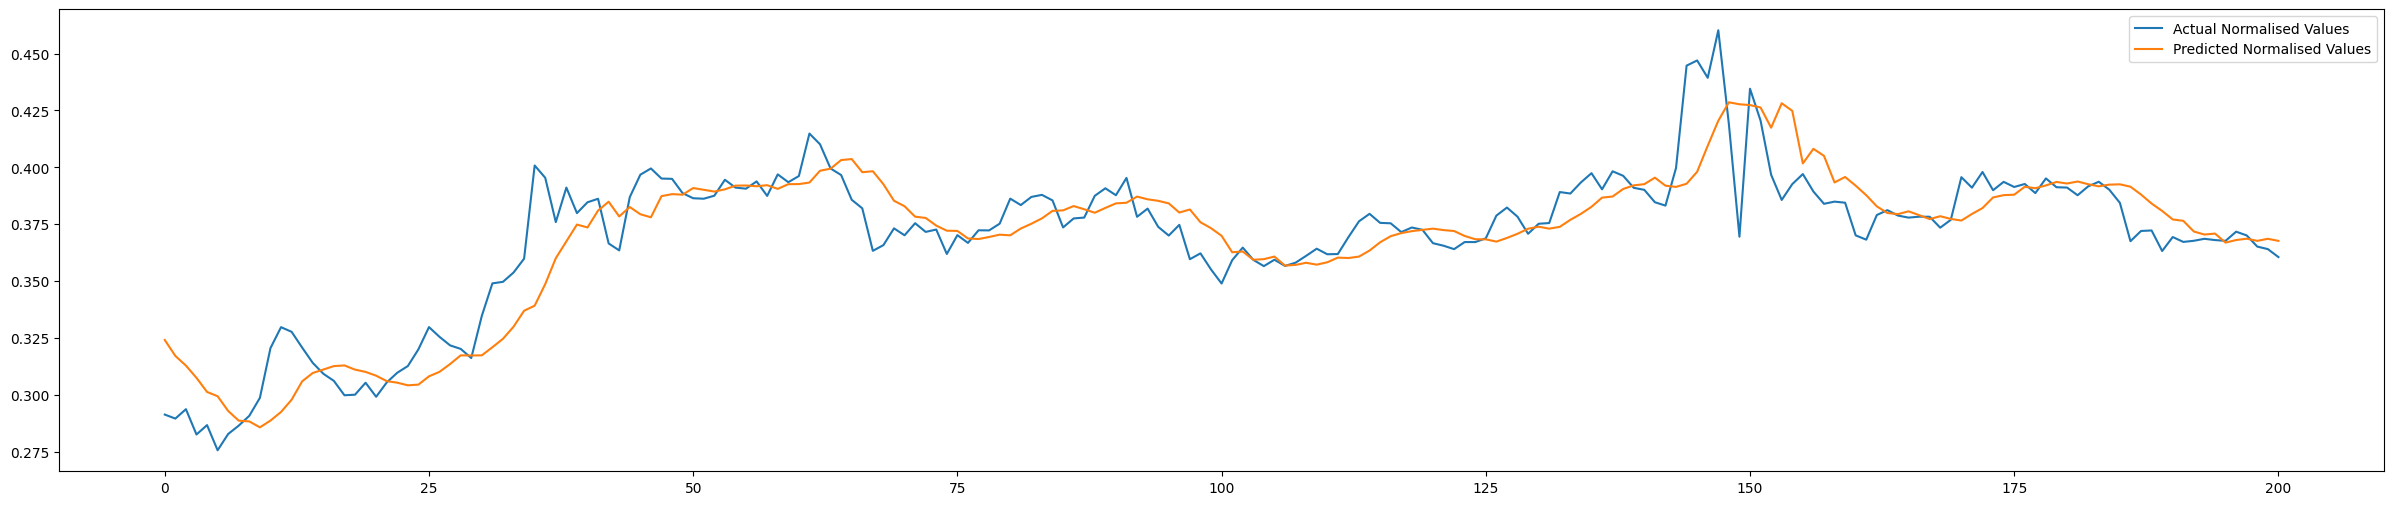

In [192]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Jaya)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [193]:
denormalized_preds_Jaya = denormalize(preds_Jaya)
# print(denormalized_preds)
preds1_Jaya = pd.DataFrame(denormalized_preds_Jaya)
preds1_Jaya['DATE'] = data1.index[-1*len(preds1_Jaya):]
preds1_Jaya = preds1_Jaya.set_index('DATE')
print(preds1_Jaya)

                   0
DATE                
2022-06-14  0.581937
2022-06-15  0.547791
2022-06-16  0.527130
2022-06-17  0.500829
2022-06-18  0.470658
...              ...
2022-12-27  0.796043
2022-12-28  0.798888
2022-12-29  0.794262
2022-12-30  0.798689
2022-12-31  0.794235

[201 rows x 1 columns]


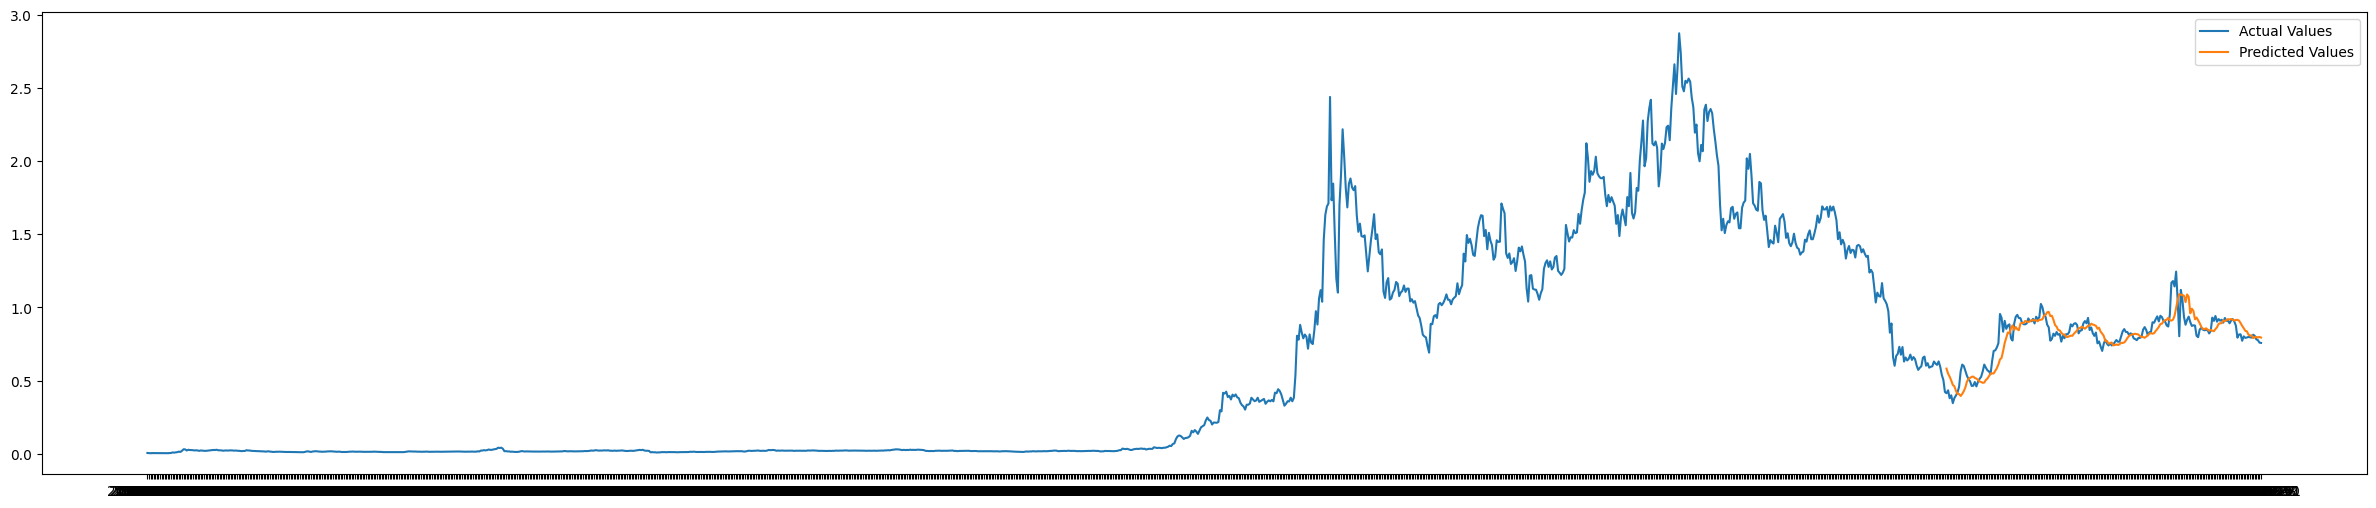

In [194]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Jaya)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [195]:
mse_Jaya = np.mean((np.array(preds1_Jaya[0]) - np.array(data1.iloc[-1*(len(preds1_Jaya)):, 0]))**2)
print("mse  "+ str(mse_Jaya))
print("rmse "+ str(np.sqrt(mse_Jaya)))

mse  0.007226922522593206
rmse 0.0850113082042219


In [196]:
(np.array(test_y) - np.array(preds_Jaya))[:, 0]

array([-3.27990448e-02, -2.75506254e-02, -1.91854958e-02, -2.49036109e-02,
       -1.45929666e-02, -2.37657014e-02, -1.01156533e-02, -2.17961877e-03,
        2.48443968e-03,  1.29686408e-02,  3.18574673e-02,  3.72871769e-02,
        2.98670834e-02,  1.48278565e-02,  4.45805341e-03, -1.85508575e-03,
       -6.50797586e-03, -1.31119377e-02, -1.10341695e-02, -4.76709931e-03,
       -9.27480747e-03, -5.88606332e-04,  4.37553889e-03,  8.47171636e-03,
        1.55193826e-02,  2.16549090e-02,  1.53654362e-02,  8.18530433e-03,
        2.84062987e-03, -1.11937628e-03,  1.73652522e-02,  2.80821777e-02,
        2.50566558e-02,  2.38251790e-02,  2.28874314e-02,  6.16452416e-02,
        4.67348321e-02,  1.58804840e-02,  2.36997599e-02,  5.03481190e-03,
        1.10745351e-02,  5.17549522e-03, -1.83413973e-02, -1.49283067e-02,
        4.35166589e-03,  1.73831526e-02,  2.14903510e-02,  7.73369215e-03,
        6.72166147e-03,  6.66816861e-04, -4.48780897e-03, -3.94408968e-03,
       -1.82907459e-03,  

In [197]:
err_test_Jaya = (np.array(test_y) - np.array(preds_Jaya))[:, 0]
mse_test_Jaya = np.mean(err_test_Jaya ** 2)
rmse_test_Jaya = np.sqrt(mse_test_Jaya)
mae_test_Jaya = np.mean(np.abs(err_test_Jaya))
mape_test_Jaya = np.mean(np.abs(err_test_Jaya) / np.array(test_y)[:, 0])
EJYN = pd.DataFrame([[mse_test_Jaya, rmse_test_Jaya, mae_test_Jaya, mape_test_Jaya]], columns = ["mse", "rmse", "mae", "mape"], index = ['Jaya'])
EJYN

,mse,rmse,mae,mape
Jaya,0.00024,0.015501,0.010788,0.029444


## TAO (Teamwork Optimisation)

### Implementing the model

In [198]:
class TAO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.supervisor = np.argmin(self.mse)
    self.best_error_graph = np.array([np.min(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, weight, bias, new_beta):
    preds = self.forward_function(weight, bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_obj = np.mean(error, axis = 1)
    cond = (new_obj < self.mse)
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.mse = np.where(cond, new_obj, self.mse)
    self.supervisor = np.argmin(self.mse)

  def optimise(self, gen):
    for i in range(gen):

      # supervisor guidance
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      S = self.beta[self.supervisor]
      new_beta = self.beta + r * (S - I * self.beta)
      self.forward_propagation(self.weight, self.bias, new_beta)

      #information sharing
      cmp_better = self.mse.T >= self.mse
      cmp_better = np.expand_dims(cmp_better, axis = [2, 3])
      cnt_better = cmp_better.sum(axis = 1)

      SB = np.tile(np.expand_dims(self.beta, axis = 0), (self.p_size, 1, 1, 1))
      # print("SB", SB.shape)
      SB = np.where(cmp_better, SB, np.zeros(SB.shape))
      SB = SB.sum(axis = 1)/cnt_better

      preds = self.forward_function(self.weight, self.bias, SB, self.train_px)
      error = (preds - self.train_py) ** 2
      S_obj = np.mean(error, axis = 1)
      SGN = np.expand_dims(np.sign(self.mse - S_obj), axis = 2)

      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      beta = self.beta + r * (SB - I * self.beta) * SGN
      self.forward_propagation(self.weight, self.bias, beta)

      #individual activity
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta + (-1*0.01 + r * 0.02) * self.beta
      self.forward_propagation(self.weight, self.bias, new_beta)

      # best error curve
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.min(self.mse)]))



### Convergence Curve

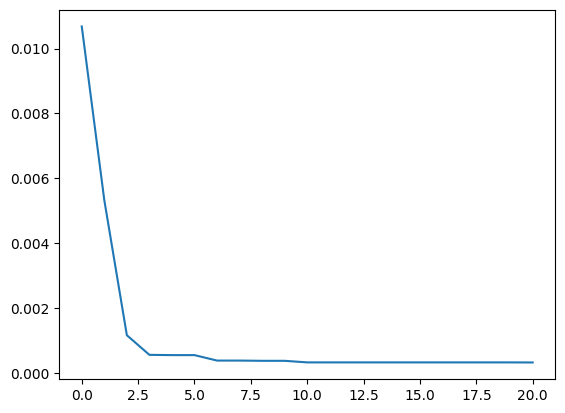

In [199]:
optimiser = TAO_ELM(2000)
optimiser.optimise(20)
ec_Tao = optimiser.best_error_graph
plt.plot(ec_Tao)
preds_train_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor],  train_x)

In [200]:
print(preds_train_Tao.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Tao = (np.array(train_y)[:, 0] - np.array(preds_train_Tao)[:, 0])
# print(error_train)
print(np.mean((error_train_Tao) ** 2))

(1134, 1)
0.00032325346839382006


### Prediction

In [201]:
preds_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor], test_x)
print(preds_Tao.shape)
error_test_Tao = (np.array(test_y)[:, 0] - np.array(preds_Tao)[:, 0])
print(np.mean(error_test_Tao ** 2))

(201, 1)
0.0002964367831778047


In [202]:
np.array(preds_Tao)[:, 0]

array([0.30401698, 0.29109004, 0.28667516, 0.28637679, 0.28094479,
       0.28347932, 0.27816583, 0.27432262, 0.28184923, 0.2782572 ,
       0.28678088, 0.2971688 , 0.30859928, 0.31532941, 0.31038951,
       0.30282338, 0.29918914, 0.2958124 , 0.29084661, 0.29135121,
       0.29496576, 0.29459896, 0.29572645, 0.29812687, 0.29933902,
       0.30688406, 0.3101418 , 0.31297475, 0.31285667, 0.30804571,
       0.30470126, 0.31292589, 0.32486071, 0.33209317, 0.34071579,
       0.34082485, 0.36081274, 0.37864972, 0.36687473, 0.37070704,
       0.36336465, 0.36849671, 0.37370413, 0.35343991, 0.36090847,
       0.36539109, 0.37212126, 0.38919629, 0.38562477, 0.38020324,
       0.38258488, 0.37443007, 0.37020391, 0.37252014, 0.3795249 ,
       0.38163564, 0.37971487, 0.38199247, 0.37749353, 0.38090743,
       0.38210266, 0.38048629, 0.39511311, 0.39628745, 0.39407193,
       0.38953227, 0.37521122, 0.37476796, 0.36347297, 0.35222158,
       0.36187999, 0.36114954, 0.36584947, 0.36371669, 0.36047

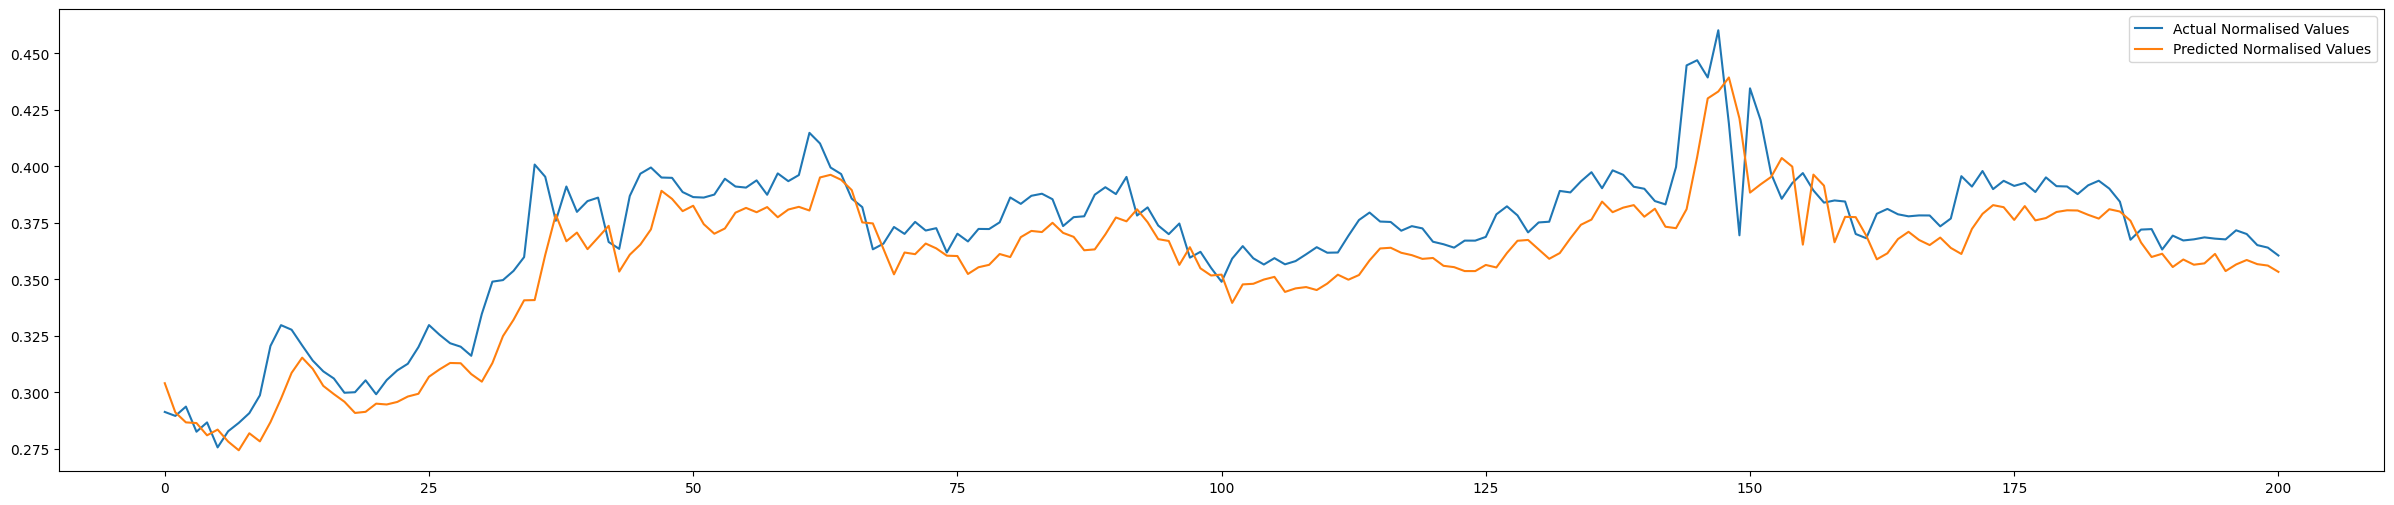

In [203]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Tao)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [204]:
denormalized_preds_Tao = denormalize(preds_Tao)
# print(denormalized_preds)
preds1_Tao = pd.DataFrame(denormalized_preds_Tao)
preds1_Tao['DATE'] = data1.index[-1*len(preds1_Tao):]
preds1_Tao = preds1_Tao.set_index('DATE')
print(preds1_Tao)

                   0
DATE                
2022-06-14  0.484134
2022-06-15  0.421161
2022-06-16  0.399654
2022-06-17  0.398201
2022-06-18  0.371739
...              ...
2022-12-27  0.740282
2022-12-28  0.749885
2022-12-29  0.740926
2022-12-30  0.737863
2022-12-31  0.724230

[201 rows x 1 columns]


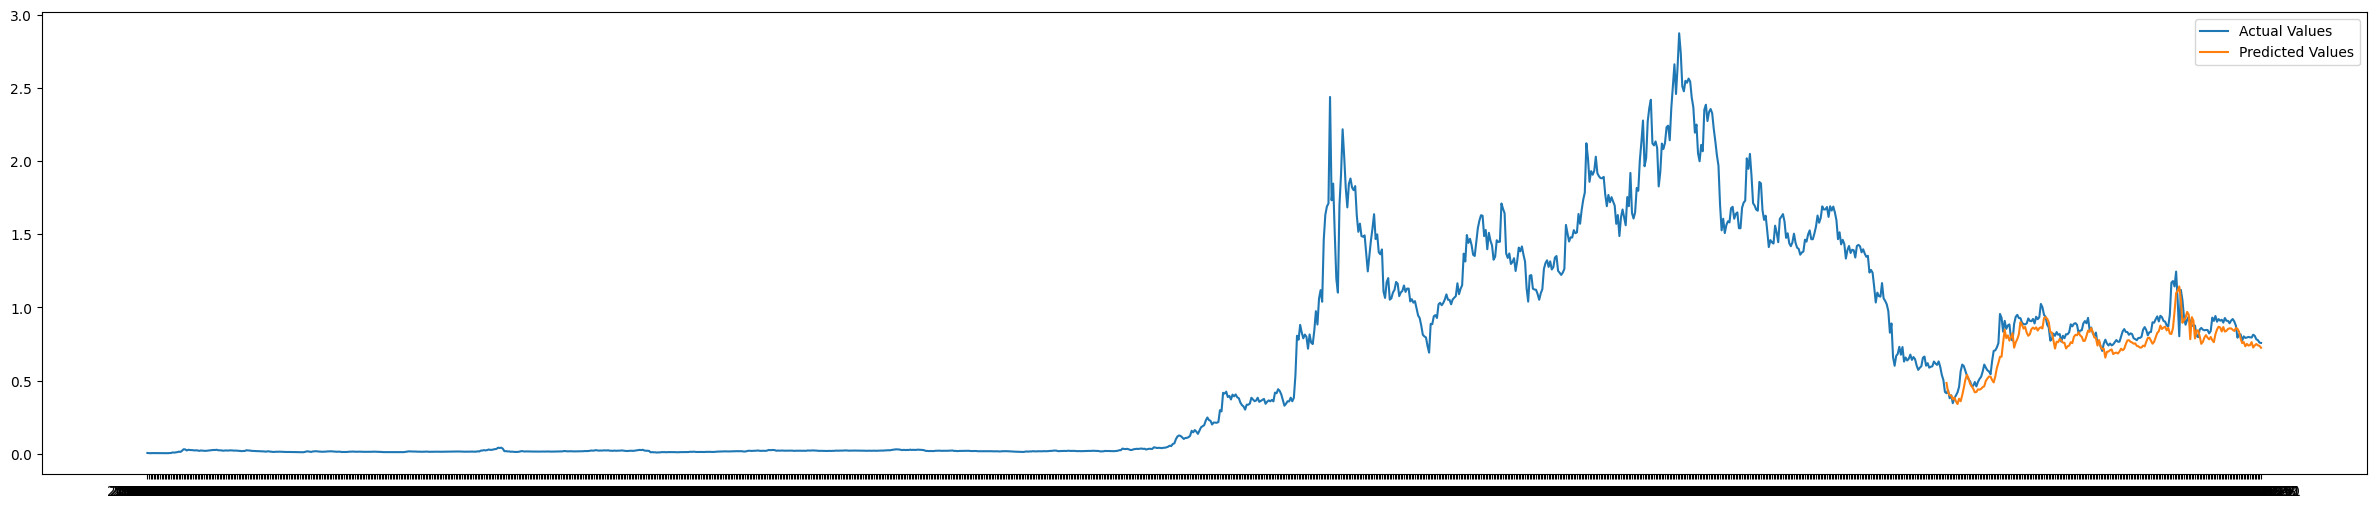

In [205]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Tao)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [206]:
mse_Tao = np.mean((np.array(preds1_Tao[0]) - np.array(data1.iloc[-1*(len(preds1_Tao)):, 0]))**2)
print("mse  "+ str(mse_Tao))
print("rmse "+ str(np.sqrt(mse_Tao)))

mse  0.008869402842214246
rmse 0.09417750709279922


In [207]:
(np.array(test_y) - np.array(preds_Tao))[:, 0]

array([-0.01272238, -0.00155632,  0.00698241, -0.00383645,  0.0057128 ,
       -0.00788229,  0.0045993 ,  0.01211977,  0.00891576,  0.02039413,
        0.03372516,  0.03255195,  0.01909141,  0.00541591,  0.00364897,
        0.00643587,  0.00691474,  0.00398025,  0.00918169,  0.01394204,
        0.0041546 ,  0.01081597,  0.01396322,  0.01450867,  0.02064719,
        0.02287677,  0.01531745,  0.00874024,  0.00731911,  0.00811094,
        0.0300054 ,  0.03605563,  0.02481005,  0.02164837,  0.01912712,
        0.05999827,  0.03459801, -0.00271979,  0.02422953,  0.00917534,
        0.02127983,  0.01768302, -0.00715343,  0.01004235,  0.02600222,
        0.03138184,  0.02739805,  0.00588531,  0.00931738,  0.0084443 ,
        0.00382992,  0.0117799 ,  0.01732515,  0.02201097,  0.01157449,
        0.00898964,  0.01409989,  0.00545626,  0.01941825,  0.01256333,
        0.01407462,  0.03437821,  0.01504508,  0.00321066,  0.00254822,
       -0.00378927,  0.00677145, -0.01147532,  0.00232806,  0.02

In [208]:
err_test_Tao = (np.array(test_y) - np.array(preds_Tao))[:, 0]
mse_test_Tao = np.mean(err_test_Tao ** 2)
rmse_test_Tao = np.sqrt(mse_test_Tao)
mae_test_Tao = np.mean(np.abs(err_test_Tao))
mape_test_Tao = np.mean(np.abs(err_test_Tao) / np.array(test_y)[:, 0])
ETAON = pd.DataFrame([[mse_test_Tao, rmse_test_Tao, mae_test_Tao, mape_test_Tao]], columns = ["mse", "rmse", "mae", "mape"], index = ['TAON'])
ETAON

,mse,rmse,mae,mape
TAON,0.000296,0.017217,0.014098,0.037681


## HHO (Harris Hawk Optimisation)

### Implementing the model

In [209]:
class HHO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 5
    self.weight = np.random.uniform(-1, 1, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    self.fitness = np.zeros([self.p_size, 1]) + -1 * np.Inf
    self.forward_propagation(self.beta)
    self.best_error_graph = np.array([-1 * np.max(self.fitness)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, new_beta):
    preds = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_fitness = -np.mean(error, axis = 1)
    cond = new_fitness > self.fitness
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.fitness = np.where(cond, new_fitness, self.fitness)

    sorted_indices = np.argsort(self.fitness[:, 0])
    self.weight = self.weight[sorted_indices]
    self.bias = self.bias[sorted_indices]
    self.beta = self.beta[sorted_indices]
    self.fitness = self.fitness[sorted_indices]

  def optimise(self, gen):
    for i in range(gen):
      half_size = int(np.floor(self.p_size / 2))

      r1 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      r2 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      A1 = 2 * r1 - 1
      C1 = 2 * r2

      C2 = self.beta.copy()
      C2[half_size:] = self.beta[0].copy()

      A2 = self.beta.copy()
      A2[:half_size] = self.beta[half_size].copy()

      new_beta = self.beta + np.abs(C1 * C2 - A1 * A2)
      new_beta[new_beta < -1] = -1
      new_beta[new_beta > 1] = 1
      self.forward_propagation(new_beta)
      # print(self.fitness[:, 0])

      self.best_error_graph = np.append(self.best_error_graph, np.array([-1 * np.max(self.fitness)]))


### Convergence Curve

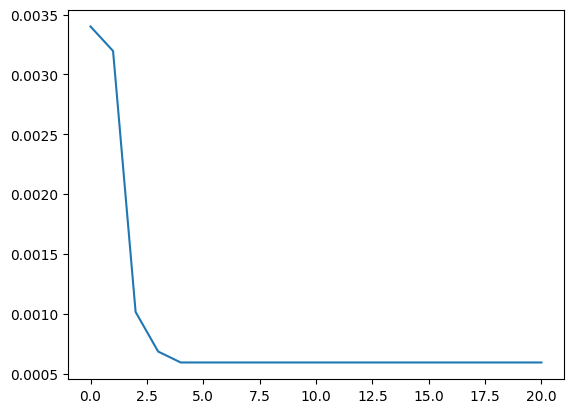

In [210]:
optimiser = HHO_ELM(2000)
optimiser.optimise(20)
ec_HHO = optimiser.best_error_graph
plt.plot(ec_HHO)
preds_train_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1],  train_x)



In [211]:
print(preds_train_HHO.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_HHO = (np.array(train_y)[:, 0] - np.array(preds_train_HHO)[:, 0])
# print(error_train)
print(np.mean((error_train_HHO) ** 2))

(1134, 1)
0.0005928715605178027


### Prediction

In [212]:
preds_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1], test_x)
print(preds_HHO.shape)
error_test_HHO = (np.array(test_y)[:, 0] - np.array(preds_HHO)[:, 0])
print(np.mean(error_test_HHO ** 2))

(201, 1)
0.0001800278721874829


In [213]:
np.array(preds_HHO)[:, 0]

array([0.31793788, 0.31025538, 0.30419214, 0.3038006 , 0.29475162,
       0.28573988, 0.27974508, 0.28481012, 0.28699589, 0.29385856,
       0.29407783, 0.30652607, 0.31822161, 0.3177101 , 0.31862377,
       0.32188211, 0.3258576 , 0.32566218, 0.31788479, 0.30796583,
       0.30581273, 0.30160252, 0.30218654, 0.30638631, 0.31100821,
       0.31414369, 0.32360391, 0.3238272 , 0.32082146, 0.32472133,
       0.32636322, 0.33586017, 0.34494271, 0.34191801, 0.33721617,
       0.3484387 , 0.3828081 , 0.39007444, 0.37669375, 0.3792953 ,
       0.39191196, 0.39755881, 0.39294504, 0.38155577, 0.36106214,
       0.37959834, 0.39644455, 0.38527335, 0.3794115 , 0.38404198,
       0.38845493, 0.39706806, 0.39742055, 0.39117646, 0.38976734,
       0.3858428 , 0.38442018, 0.38676292, 0.38865913, 0.39359842,
       0.39343394, 0.39424279, 0.40179663, 0.40593917, 0.39622531,
       0.39297693, 0.39721279, 0.39291838, 0.3797338 , 0.37474868,
       0.37054569, 0.36818919, 0.36368403, 0.36065778, 0.36521

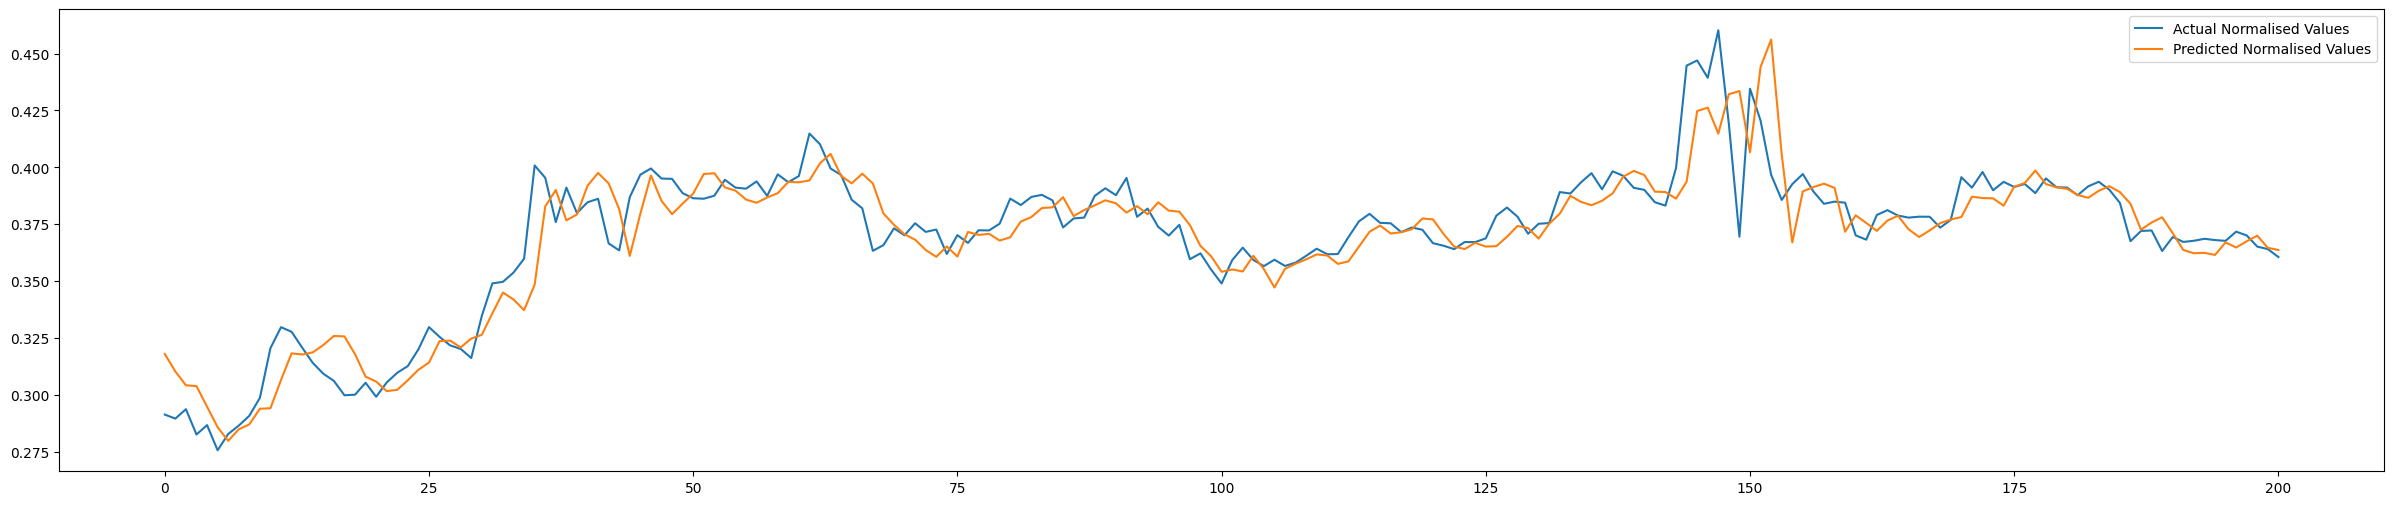

In [214]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_HHO)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [215]:
denormalized_preds_HHO = denormalize(preds_HHO)
# print(denormalized_preds)
preds1_HHO = pd.DataFrame(denormalized_preds_HHO)
preds1_HHO['DATE'] = data1.index[-1*len(preds1_HHO):]
preds1_HHO = preds1_HHO.set_index('DATE')
print(preds1_HHO)

                   0
DATE                
2022-06-14  0.551949
2022-06-15  0.514524
2022-06-16  0.484988
2022-06-17  0.483080
2022-06-18  0.438999
...              ...
2022-12-27  0.780008
2022-12-28  0.793328
2022-12-29  0.805352
2022-12-30  0.779410
2022-12-31  0.774728

[201 rows x 1 columns]


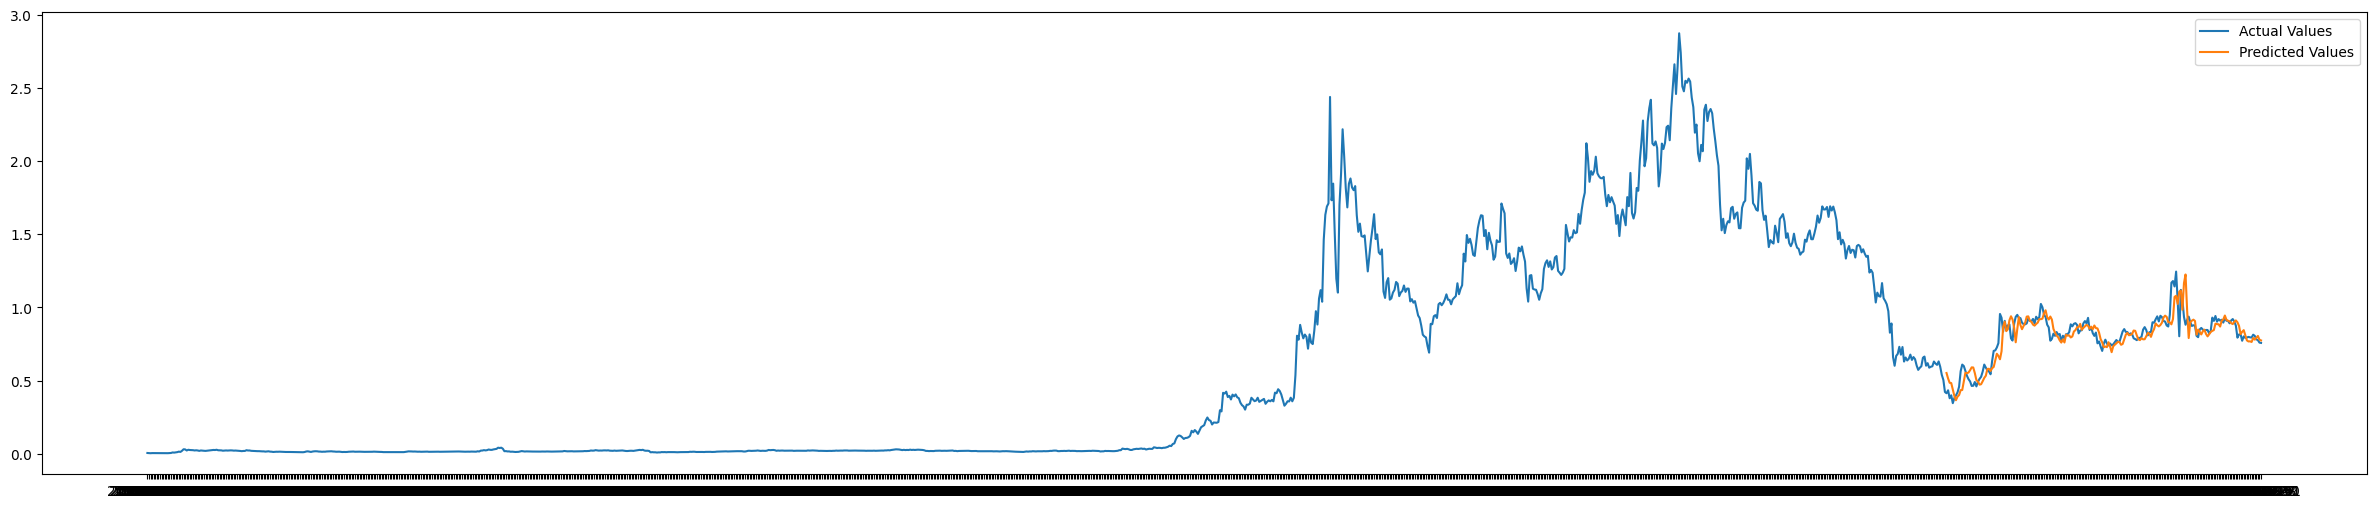

In [216]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_HHO)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [217]:
mse_HHO = np.mean((np.array(preds1_HHO[0]) - np.array(data1.iloc[-1*(len(preds1_HHO)):, 0]))**2)
print("mse  "+ str(mse_HHO))
print("rmse "+ str(np.sqrt(mse_HHO)))

mse  0.005948291325860513
rmse 0.07712516661804053


In [218]:
(np.array(test_y) - np.array(preds_HHO))[:, 0]

array([-2.66432788e-02, -2.07216601e-02, -1.05345684e-02, -2.12602525e-02,
       -8.09403670e-03, -1.01428578e-02,  3.02004406e-03,  1.63226496e-03,
        3.76910534e-03,  4.79277288e-03,  2.64282115e-02,  2.31946843e-02,
        9.46907864e-03,  3.03521815e-03, -4.58529181e-03, -1.26228561e-02,
       -1.97537170e-02, -2.58695362e-02, -1.78564820e-02, -2.67258406e-03,
       -6.69237218e-03,  3.81240928e-03,  7.50313596e-03,  6.24922999e-03,
        8.97799863e-03,  1.56171352e-02,  1.85534223e-03, -2.11220895e-03,
       -6.45678346e-04, -8.56467719e-03,  8.34344447e-03,  1.31213479e-02,
        4.72805181e-03,  1.18235217e-02,  2.26267518e-02,  5.23844273e-02,
        1.26026568e-02, -1.41445095e-02,  1.44105116e-02,  5.87086104e-04,
       -7.26748143e-03, -1.13790776e-02, -2.63943437e-02, -1.80735104e-02,
        2.58485570e-02,  1.71745944e-02,  3.07475798e-03,  9.80825056e-03,
        1.55306540e-02,  4.60555557e-03, -2.04012893e-03, -1.08580973e-02,
       -9.89148736e-03,  

In [219]:
err_test_HHO = (np.array(test_y) - np.array(preds_HHO))[:, 0]
mse_test_HHO = np.mean(err_test_HHO ** 2)
rmse_test_HHO = np.sqrt(mse_test_HHO)
mae_test_HHO = np.mean(np.abs(err_test_HHO))
mape_test_HHO = np.mean(np.abs(err_test_HHO) / np.array(test_y)[:, 0])
EHHON = pd.DataFrame([[mse_test_HHO, rmse_test_HHO, mae_test_HHO, mape_test_HHO]], columns = ["mse", "rmse", "mae", "mape"], index = ['HHO'])
EHHON

,mse,rmse,mae,mape
HHO,0.00018,0.013417,0.009028,0.024434


## Comparison Of All

### Convergence Curve

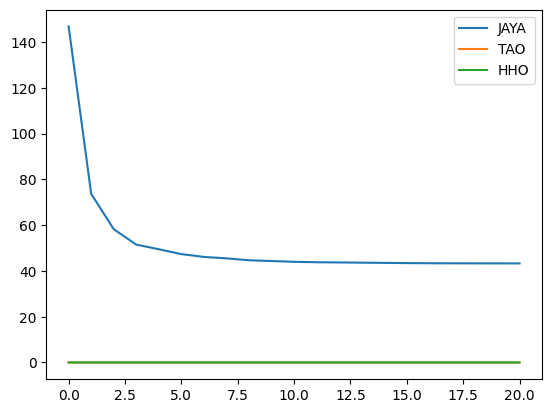

In [220]:
plt.figure()
plt.plot(ec_Jaya)
plt.plot(ec_Tao)
plt.plot(ec_HHO)
plt.legend(["JAYA", "TAO", "HHO"])
plt.show()


### Prediction

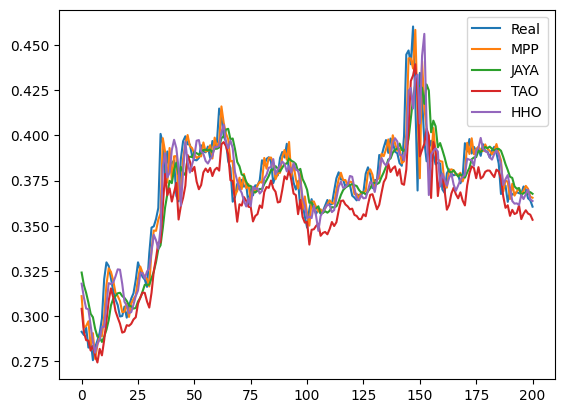

In [221]:
plt.figure()
plt.plot(np.array(test_y[9]))
plt.plot(pred_y_MPP)
plt.plot(np.array(preds_Jaya))
plt.plot(np.array(preds_Tao))
plt.plot(np.array(preds_HHO))
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

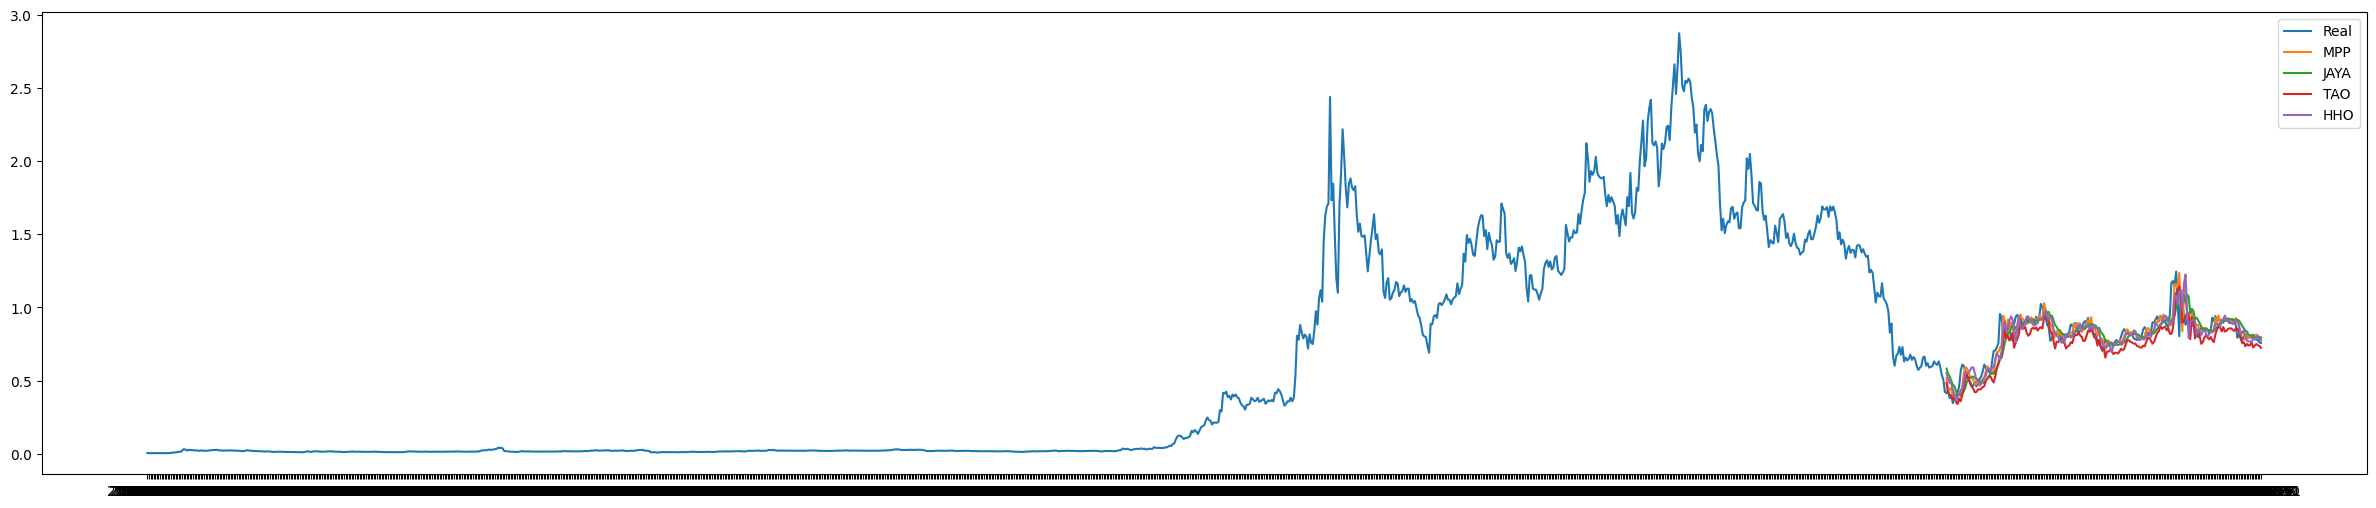

In [222]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.plot(preds1_Jaya)
plt.plot(preds1_Tao)
plt.plot(preds1_HHO)
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

### Errors

In [223]:
EN = pd.concat([MPPN, EJYN, ETAON, EHHON])
EN

,mse,rmse,mae,mape
MPPN,0.000116,0.010771,0.006950,0.018641
Jaya,0.000240,0.015501,0.010788,0.029444
TAON,0.000296,0.017217,0.014098,0.037681
HHO,0.000180,0.013417,0.009028,0.024434
